In [65]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colorbar import Colorbar
from matplotlib.colors import LogNorm, Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.animation as animation
from matplotlib.ticker import FuncFormatter

In [66]:
# Load Data
world = gpd.read_file("worldmap.gpkg") 
df = pd.read_csv('LifeExpectancyClean.csv', index_col=0)

In [67]:
# Rename 'ADMIN' Column to 'Country'
world = world.rename(columns={'ADMIN': 'Country'})

# Rename Countries in World
world['Country'] = world['Country'].replace('The Bahamas', 'Bahamas')
world['Country'] = world['Country'].replace('Brunei', 'Brunei Darussalam')
world['Country'] = world['Country'].replace('Democratic Republic of the Congo', 'DR of the Congo')
world['Country'] = world['Country'].replace("North Korea", "Democratic People's Republic of Korea")
world['Country'] = world['Country'].replace('Republic of the Congo', 'Congo')
world['Country'] = world['Country'].replace("Republic of Cote D'Ivoire", "Cote d'Ivoire")
world['Country'] = world['Country'].replace('Laos', "Lao People's DR")
world['Country'] = world['Country'].replace('South Korea', 'Republic of Korea')
world['Country'] = world['Country'].replace('Moldova', 'Republic of Moldova')
world['Country'] = world['Country'].replace('Republic of Serbia', 'Serbia')
world['Country'] = world['Country'].replace('eSwatini', 'Swaziland')
world['Country'] = world['Country'].replace('Syria', 'Syrian Arab Republic')
world['Country'] = world['Country'].replace('East Timor', 'Timor-Leste')
world['Country'] = world['Country'].replace('United States of America', 'United States')


# Merge World and Life Expectancy Data on 'Country'
combined = world.merge(df, on='Country', how='left')

World Map Animation

In [68]:
# Create figure and axis
fig, ax = plt.subplots(1, figsize=(10, 7))

# Normalize color scale for Life Expectancy
norm = Normalize(vmin=50, vmax=85)  # Manually set min and max values for the color scale

def update(date):
    ax.clear()
    
    # Filter the data for the current year
    merged = combined[combined['Year'] == date]

    # Plot the Life Expectancy by country
    merged.plot(column="Life Expectancy", cmap="viridis", ax=ax, edgecolor="gray", norm=norm)

    # Plot the World Country Outlines
    world.boundary.plot(ax=ax, linewidth=1, color="black")

    # Add Year Label
    ax.text(0.02, 0.95, str(int(date)), transform=ax.transAxes, fontsize=12, 
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
    
    # Add Title
    ax.set_title("Life Expectancy by Country from 2000-2015")
    ax.axis('off')

    # Add a black border around the plot
    rect = Rectangle(
        (0, 0), 1, 1, transform=ax.transAxes,  # (x, y, width, height) in normalized axes coordinates
        color='black',
        linewidth=2,
        fill=False
    )
    ax.add_patch(rect)

# Set up the colorbar
sm = ScalarMappable(norm=norm, cmap="viridis")
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", pad=0)

# Manually define the colorbar ticks
ticks = [55, 60, 65, 70, 75, 80, 85]
cbar.set_ticks(ticks)
cbar.ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))  # Format as integers
cbar.set_label("Life Expectancy")

# Create the animation object
ani = animation.FuncAnimation(fig, update, 
        frames=sorted(set(df['Year'])),  # Use years from df
        interval=300)

plt.close(fig)

# Save/Embed Animation
ani.save('LifeExpectancyWorld.mp4', writer='ffmpeg')

World Life Expectancy 2015

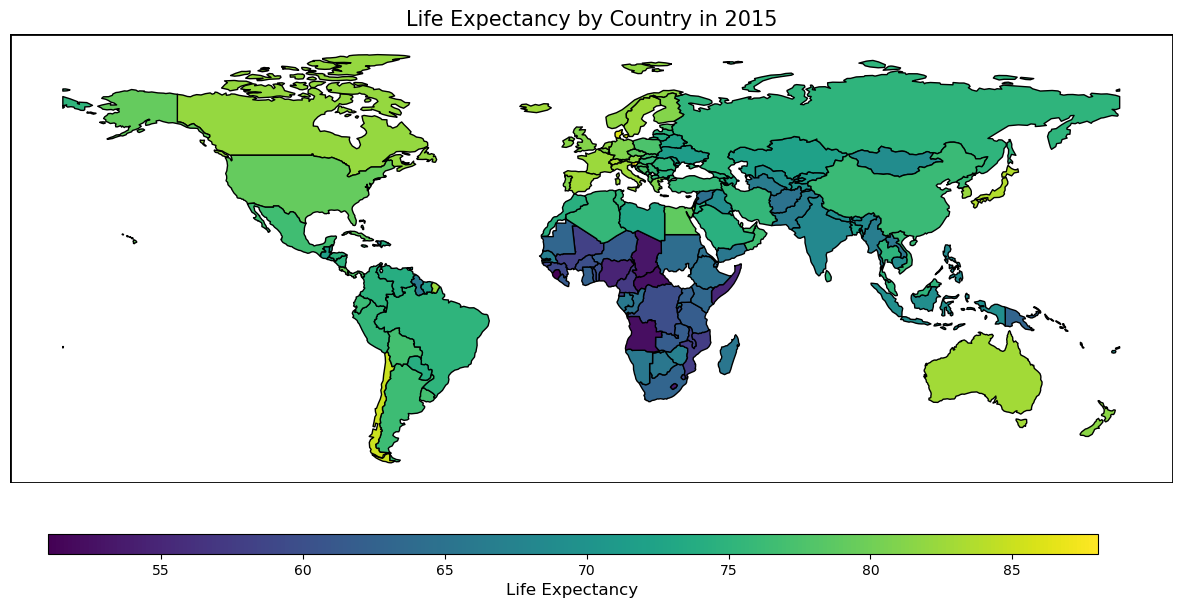

In [70]:
# Load and prepare data
df = pd.read_csv('LifeExpectancyClean.csv', index_col=0)
df = df[df['Year'] == 2015]

# Merge World and Life Expectancy Data on 'Country'
combined = world.merge(df, on='Country', how='left')

# Plot life expectancy data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the data
combined.plot(
    column='Life Expectancy',
    cmap='viridis',
    legend=False,
    ax=ax,
    edgecolor='black'
)

# Turn off the axes
ax.axis('off')

# Add a black border around the plot
rect = Rectangle(
    (0, 0), 1, 1, transform=ax.transAxes,  # (x, y, width, height) in normalized axes coordinates
    color='black',
    linewidth=2,
    fill=False
)
ax.add_patch(rect)

# Create a colorbar that matches the plot size
norm = Normalize(vmin=combined['Life Expectancy'].min(), vmax=combined['Life Expectancy'].max())
sm = ScalarMappable(cmap='viridis', norm=norm)

# Add the colorbar
cbar = Colorbar(ax=ax.figure.add_axes([0.15, 0.2, 0.7, 0.02]),  # Adjust [left, bottom, width, height]
                mappable=sm,
                orientation='horizontal')
cbar.set_label("Life Expectancy", fontsize=12)

# Set plot title
ax.set_title("Life Expectancy by Country in 2015", fontsize=15)

plt.show()